In [1]:
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
from gensim import corpora, models
from gensim.models.wrappers import LdaMallet

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [2]:
with open('resources/lemmatized_data.npy', 'rb') as infile:
    data_lemmatized = np.load(infile)
    
data_lemmatized

array([list(['update', 'depressed', 'asshole', 'month', 'ago', 'post', 'situation', 'depress', 'future', 'link', 'url', 'well', 'finally', 'leave', 'house', 'today', 'first', 'time', 'month', 'amazon', 'grocery', 'seek', 'help', 'think', 'would', 'post', 'update', 'care', 'think', 'doctor', 'do', 'not', 'think', 'hit', 'threshold', 'consider', 'depressed', 'need', 'help', 'emotional', 'control', 'therapy', 'could', 'good', 'open', 'option', 'go', 'take', 'awhile', 'appointment', 'slot', 'let', 'see', 'money', 'can', 'not', 'complain', 'wait', 'subsidy', 'slot', 'nonetheless', 'prescribe', 'fluoxetine', 'month', 'help', 'mood', 'honest', 'still', 'adverse', 'get', 'help', 'social_worker', 'horrible', 'experience', 'ppl', 'last', 'post', 'may', 'may', 'fault', 'take', 'certain', 'advice', 'tell', 'official', 'channel', 'come', 'back', 'run', 'money', 'feel', 'soul', 'crush', 'feel', 'go', 'casino', 'gamble', 'saving', 'away', 'know', 'may', 'become', 'millionaire', 'overnight', 'nonethel

In [3]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

In [4]:
# Create Corpus
texts = list(data_lemmatized)

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Human readable format of corpus (term-frequency)
print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[('actually', 1), ('add', 1), ('adverse', 1), ('advice', 1), ('advise', 2), ('ago', 1), ('alone', 1), ('amazon', 1), ('ambulance', 1), ('anymore', 1), ('anyone', 1), ('anything', 1), ('anyway', 2), ('appointment', 1), ('appreciate', 1), ('ask', 1), ('aspirin', 2), ('asshole', 1), ('assume', 1), ('attempt', 1), ('awake', 1), ('away', 1), ('awhile', 1), ('back', 1), ('become', 1), ('bed', 1), ('blood', 2), ('bridge', 1), ('budget', 1), ('burden', 1), ('burn', 1), ('bury', 1), ('call', 1), ('can', 2), ('candy', 1), ('care', 1), ('casino', 1), ('cement', 1), ('certain', 1), ('channel', 1), ('come', 1), ('complain', 1), ('consider', 1), ('control', 1), ('cotton', 1), ('could', 4), ('crush', 1), ('cry', 1), ('dad', 1), ('day', 1), ('dead', 1), ('debt', 1), ('decide', 1), ('deed', 1), ('degree', 4), ('depress', 1), ('depressed', 2), ('despair', 1), ('die', 4), ('disappear', 1), ('disappoint', 1), ('distraction', 1), ('do', 11), ('doctor', 1), ('drop', 1), ('effort', 1), ('emotional', 1), ('e

In [5]:
mallet_path = './mallet-2.0.8/bin/mallet' # update this path
ldamallet = LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

In [6]:
# Show Topics
pprint(ldamallet.show_topics(formatted=False))

[(8,
  [('country', 0.03527968094897229),
   ('force', 0.02883730442785561),
   ('army', 0.02311074752019634),
   ('serve', 0.021985888127620413),
   ('ns', 0.019122609673790775),
   ('man', 0.01595255138562225),
   ('number', 0.013907352490029655),
   ('benefit', 0.012066673483996319),
   ('military', 0.011759893649657429),
   ('power', 0.01145311381531854)]),
 (16,
  [('work', 0.08478038815117467),
   ('job', 0.05775838053672579),
   ('year', 0.05227969170767945),
   ('study', 0.030736372922276906),
   ('level', 0.021543318785402544),
   ('degree', 0.021357600520011143),
   ('poly', 0.014393165567833597),
   ('part', 0.014021729037050793),
   ('future', 0.01355743337357229),
   ('business', 0.012721701179310985)]),
 (6,
  [('family', 0.03675180347046208),
   ('home', 0.023006434002729576),
   ('move', 0.02154416065509846),
   ('stay', 0.02047182686683564),
   ('house', 0.019302008188730745),
   ('leave', 0.019204523298888672),
   ('room', 0.017742249951257553),
   ('mother', 0.016474

In [7]:
# Compute Coherence Score
coherence_model_ldamallet = models.CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


Coherence Score:  0.44127383731484954


In [8]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = models.CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [9]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=2, limit=40, step=6)

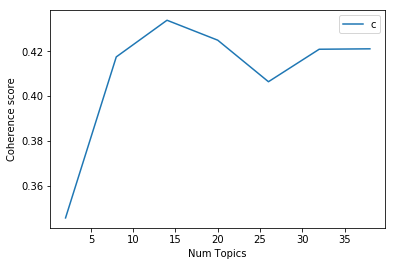

In [10]:
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [11]:
# Print the coherence scores
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.3455
Num Topics = 8  has Coherence Value of 0.4175
Num Topics = 14  has Coherence Value of 0.4339
Num Topics = 20  has Coherence Value of 0.425
Num Topics = 26  has Coherence Value of 0.4064
Num Topics = 32  has Coherence Value of 0.421
Num Topics = 38  has Coherence Value of 0.4212


In [12]:
# Select the model and print the topics
optimal_model = model_list[2]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.036*"pay" + 0.027*"money" + 0.026*"year" + 0.021*"high" + 0.014*"make" + '
  '0.012*"government" + 0.012*"cost" + 0.011*"low" + 0.008*"singaporean" + '
  '0.008*"point"'),
 (1,
  '0.048*"suicide" + 0.036*"case" + 0.018*"police" + 0.018*"man" + '
  '0.016*"attempt" + 0.013*"url" + 0.013*"report" + 0.013*"person" + '
  '0.012*"young" + 0.011*"woman"'),
 (2,
  '0.020*"law" + 0.018*"society" + 0.017*"gay" + 0.016*"change" + '
  '0.014*"child" + 0.013*"agree" + 0.011*"accept" + 0.011*"argument" + '
  '0.011*"state" + 0.011*"opinion"'),
 (3,
  '0.033*"depression" + 0.019*"doctor" + 0.015*"treatment" + 0.015*"imh" + '
  '0.013*"suffer" + 0.013*"month" + 0.013*"condition" + 0.013*"give" + '
  '0.013*"medical" + 0.013*"care"'),
 (4,
  '0.108*"life" + 0.052*"time" + 0.047*"good" + 0.046*"thing" + 0.027*"make" + '
  '0.027*"day" + 0.025*"find" + 0.025*"live" + 0.022*"end" + 0.019*"hard"'),
 (5,
  '0.059*"school" + 0.024*"teacher" + 0.021*"student" + 0.018*"pretty" + '
  '0.016*"friend" 

In [14]:
def format_topics_sentences(ldamodel, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

NameError: name 'data' is not defined

In [15]:
with open('resources/content.npy', 'rb') as infile:
    data = np.load(infile)
    
df_topic_sents_keywords = format_topics_sentences(optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'resources/content.npy'

In [ ]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [ ]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

In [ ]:
# Visualize the topics
def malletmodel2ldamodel(mallet_model, gamma_threshold=0.001, iterations=50):
    """
    Function to convert mallet model to gensim LdaModel. This works by copying the
    training model weights (alpha, beta...) from a trained mallet model into the
    gensim model.

    Args:
    mallet_model : Trained mallet model
    gamma_threshold : To be used for inference in the new LdaModel.
    iterations : number of iterations to be used for inference in the new LdaModel.

    Returns:
    model_gensim : LdaModel instance; copied gensim LdaModel
    """
    model_gensim = gensim.models.ldamodel.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, iterations=iterations,
        eta=mallet_model.word_topics,
        gamma_threshold=gamma_threshold,
        dtype=np.float64 # don't loose precision when converting from MALLET
    )
    model_gensim.expElogbeta[:] = mallet_model.wordtopics
    return model_gensim

In [ ]:
lda_model2 = malletmodel2ldamodel(optimal_model)
vis2 = pyLDAvis.gensim.prepare(lda_model2, corpus, id2word)
vis2